In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel('C://Users//Stephanie//Desktop//dog proyect//datos 1 prueba 1.xlsx')

In [3]:
del df['Titulo']
del df['Vestidos para perros']
del df['en Camisas para perros']
del df['Chubasqueros para perros']
del df['Disfraces para perros']
del df['Sudaderas con capucha para perros']
del df['Ropa y accesorios para perros']
del df['Abrigos y chaquetas para perros']
del df['Jersey para perros']
del df['Botas y protectores de patas']
del df['Link']

In [4]:
#Se convierten las variables categóricas en numéricas
columna = "Categoría" 
keys=df['Categoría'] .unique()
values=range(len(keys))
Categoría=dict(zip(keys,values))
df['Categoría']=df['Categoría'].replace(Categoría)

columna = "Material" 
keys=df['Material'] .unique()
values=range(len(keys))
Material=dict(zip(keys,values))
df['Material']=df['Material'].replace(Material)

columna = "Color"
keys=df['Color'] .unique()
values=range(len(keys))
Color=dict(zip(keys,values))
df['Color']=df['Color'].replace(Color)

columna = "Prime"
keys=df['Prime'] .unique()
values=range(len(keys))
Prime=dict(zip(keys,values))
df['Prime']=df['Prime'].replace(Prime)

columna = "Epoca del año"
keys=df['Epoca del año'] .unique()
values=range(len(keys))
Epoca=dict(zip(keys,values))
df['Epoca del año']=df['Epoca del año'].replace(Epoca)

columna = "Tallas"
keys=df['Tallas'] .unique()
values=range(len(keys))
Tallas=dict(zip(keys,values))
df['Tallas']=df['Tallas'].replace(Tallas)

In [5]:
X = np.asarray(df[['Precio','Color','Material','Prime','Tallas','Epoca del año','Valoraciones','Promedio Estrellas (5)', '5 estrellas %','4 estrellas %','3 estrellas %','2 estrellas %','1 estrella %','Antigüedad del producto']])
y = np.asarray(df['Categoría'])

In [9]:
#Primero se busca predecir la categoría para luego obtener su posicionamiento ya que en Amazon los productos estan posicionados por categoría.
loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf =RandomForestClassifier(n_estimators =500) #Arbol de decisión
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1[0])
print("Accuracy: ", accuracy_score(y, yhat))

Accuracy:  0.9928379588182632


In [17]:
#Se colocan los atributos del productp para predecir su categoría
Producto = [[14.99,0,0,0,0,0,104,4.5,0.7,0.16,0.08,0.03,0.03,2019]]
yhat1 = clf.predict(np.array(Producto))
#Resultado va a ser la categoria de ese producto (0-7)
Categoria_X = yhat1[0]

In [18]:
Categoria_X

0

In [19]:
#Se importa un dataset que contiene el posiconamiento de los productos
df = pd.read_excel('C://Users//Stephanie//Desktop//dog proyect//Datos Posicionamiento 1.xlsx')
df1=pd.read_excel('C://Users//Stephanie//Desktop//dog proyect//Datos Posicionamiento 1.xlsx')
del df['Titulo']
del df['Link']

In [20]:
#Se convierten las variables categóricas a numéricas
columna = "Categoría" 
keys=df['Categoría'] .unique()
values=range(len(keys))
Categoría=dict(zip(keys,values))
df['Categoría']=df['Categoría'].replace(Categoría)


columna = "Material" 
keys=df['Material'] .unique()
values=range(len(keys))
Material=dict(zip(keys,values))
df['Material']=df['Material'].replace(Material)


columna = "Color"
keys=df['Color'] .unique()
values=range(len(keys))
Color=dict(zip(keys,values))
df['Color']=df['Color'].replace(Color)

columna = "Prime"
keys=df['Prime'] .unique()
values=range(len(keys))
Prime=dict(zip(keys,values))
df['Prime']=df['Prime'].replace(Prime)

columna = "Epoca del año"
keys=df['Epoca del año'] .unique()
values=range(len(keys))
Epoca=dict(zip(keys,values))
df['Epoca del año']=df['Epoca del año'].replace(Epoca)

columna = "Tallas"
keys=df['Tallas'] .unique()
values=range(len(keys))
Tallas=dict(zip(keys,values))
df['Tallas']=df['Tallas'].replace(Tallas)


In [21]:
df.head()

,Posicionamiento,Categoría,Color,Material,Precio,Prime,Tallas,Epoca del año,Valoraciones,Promedio Estrellas (5),5 estrellas %,4 estrellas %,3 estrellas %,2 estrellas %,1 estrella %,Antigüedad del producto
0,905,0,0,0,14.99,0,0,0,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
1,898,0,0,0,14.99,0,1,0,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
2,1562,0,0,0,14.99,0,2,0,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
3,484,0,0,0,14.99,0,3,0,104,4.5,0.70,0.16,0.08,0.03,0.03,2019
4,29,1,1,1,11.99,0,0,1,66,4.5,0.05,0.19,0.10,0.08,0.04,2017


In [22]:
#Se filtra el dataset en base a la categoría obtenida en los pasos anteriores
df21 = df[df["Categoría"]==Categoria_X]

Text(0.5, 1.0, 'Posicionamiento')

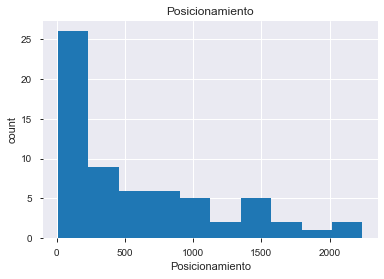

In [23]:
# A continuación se va a realizar un binning para poder obtener el posicionamiento. Se dividirá en 3 grupos: Más Vendidos,
#Menos Vendidos y Medianamente vendidos.

plt.hist(df21["Posicionamiento"])
# set x/y labels and plot title
plt.xlabel("Posicionamiento")
plt.ylabel("count")
plt.title("Posicionamiento")

In [24]:
bins = np.linspace(min(df21["Posicionamiento"]), max(df21["Posicionamiento"]), 4)
bins

array([   9.,  753., 1497., 2241.])

In [25]:
group_names=['Más Vendidos', 'Medianamente Vendidos', 'Menos Vendidos']

In [26]:
df21['Posicionamientos'] = pd.cut(df21['Posicionamiento'], bins, labels=group_names, include_lowest=True )

C:\Users\Stephanie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df21["Posicionamientos"].value_counts()

Más Vendidos             44
Medianamente Vendidos    12
Menos Vendidos            8
Name: Posicionamientos, dtype: int64

In [31]:
# Se clasifica el posicionamiento del producto en base a la categoría obtenida anteriormente.
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

Categoria_x = 2 #Categoria que elegimos hacer clasificación

df_2 = df21[['Material','Precio','Prime','Color','Tallas','Epoca del año','Valoraciones','Promedio Estrellas (5)','Antigüedad del producto']]

X = np.asanyarray(df_2)
y = np.asanyarray(df21["Posicionamientos"])

loo = LeaveOneOut()
loo.get_n_splits(X)
yhat=[]

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf =RandomForestClassifier(n_estimators =500) #Arbol de decisión
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1[0])
print("Accuracy: ", accuracy_score(y, yhat))

Accuracy:  0.59375


In [30]:
yhat1 = clf.predict(np.array(Producto))
yhat1 # Posicionamiento de ese producto

array(['Medianamente Vendidos'], dtype=object)